In [14]:
from preprocessing_utils import preprocess_data, preprocess_test_data
import sys
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.linear_model import SGDClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from itertools import combinations

In [15]:
# Reading in the training data
file_path = '../data/project_adult.csv'

try:
    df = pd.read_csv(file_path, header=None, encoding='utf-8')
    print(f"Successfully loaded '{file_path}'. First 5 rows:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty or contains no data.")
except pd.errors.ParserError as e:
    print(f"Error: A parsing error occurred while reading '{file_path}': {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# preprocess training data
X, y = preprocess_data(df)

Successfully loaded '../data/project_adult.csv'. First 5 rows:
        0    1                 2       3          4              5   \
0      NaN  age         workclass  fnlwgt  education  education-num   
1   5514.0   33         Local-gov  198183  Bachelors             13   
2  19777.0   36           Private   86459  Assoc-voc             11   
3  10781.0   58  Self-emp-not-inc  203039        9th              5   
4  32240.0   21           Private  180190  Assoc-voc             11   

                   6                7              8      9       10  \
0      marital-status       occupation   relationship   race     sex   
1       Never-married   Prof-specialty  Not-in-family  White  Female   
2  Married-civ-spouse  Exec-managerial        Husband  White    Male   
3           Separated     Craft-repair  Not-in-family  White    Male   
4  Married-civ-spouse  Farming-fishing        Husband  White    Male   

             11            12              13              14      15  
0  ca

,original_index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,1,33,1,198183,9,13,4,9,1,4,0,0,0,50,38,1
1,2,36,3,86459,8,11,2,3,0,4,1,0,1887,50,38,1
2,3,58,5,203039,6,5,5,2,1,4,1,0,0,40,38,0
3,4,21,3,180190,8,11,2,4,0,4,1,0,0,46,38,0
4,5,27,3,279872,15,10,0,7,1,4,1,0,0,40,38,0


Means after scaling:
 age               1.636692e-16
fnlwgt            1.936753e-17
education-num    -6.137597e-18
capital-gain     -2.427760e-17
capital-loss     -2.836934e-17
hours-per-week   -2.373204e-16
dtype: float64

Standard deviations after scaling:
 age               1.000019
fnlwgt            1.000019
education-num     1.000019
capital-gain      1.000019
capital-loss      1.000019
hours-per-week    1.000019
dtype: float64


In [16]:
# Reading in the test data

file_path = '../data/project_validation_inputs.csv'

try:
    df_test = pd.read_csv(file_path, header=None, encoding='utf-8')
    print(f"Successfully loaded '{file_path}'. First 5 rows:")
    print(df_test.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty or contains no data.")
except pd.errors.ParserError as e:
    print(f"Error: A parsing error occurred while reading '{file_path}': {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# preprocess test data
X_df_test = preprocess_test_data(df_test)

Successfully loaded '../data/project_validation_inputs.csv'. First 5 rows:
        0    1          2       3             4              5   \
0      NaN  age  workclass  fnlwgt     education  education-num   
1  14160.0   27    Private  160178  Some-college             10   
2  27048.0   45  State-gov   50567       HS-grad              9   
3  28868.0   29    Private  185908     Bachelors             13   
4   5667.0   30    Private  190040     Bachelors             13   

                   6                  7              8      9       10  \
0      marital-status         occupation   relationship   race     sex   
1            Divorced       Adm-clerical  Not-in-family  White  Female   
2  Married-civ-spouse    Exec-managerial           Wife  White  Female   
3  Married-civ-spouse    Exec-managerial        Husband  Black    Male   
4       Never-married  Machine-op-inspct  Not-in-family  White  Female   

             11            12              13              14  
0  capital-ga

,original_index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,1,-0.851191,2,-0.277853,15,-0.031693,0,0,1,4,0,-0.147225,-0.211274,-0.212164,36
1,2,0.469374,5,-1.304090,11,-0.421896,2,3,5,4,0,-0.147225,-0.211274,-0.051009,36
2,3,-0.704461,2,-0.036955,9,1.138915,2,3,0,2,1,-0.147225,-0.211274,1.157652,36
3,4,-0.631097,2,0.001731,9,1.138915,4,6,1,4,0,-0.147225,-0.211274,-0.051009,36
4,5,-0.704461,4,-0.004766,15,-0.031693,0,2,1,4,1,0.128973,-0.211274,0.754765,36


Means after scaling:
 age              -7.527629e-17
fnlwgt            1.210966e-16
education-num     1.996458e-16
capital-gain     -2.427388e-17
capital-loss      5.454804e-18
hours-per-week    2.705583e-16
dtype: float64

Standard deviations after scaling:
 age               1.000077
fnlwgt            1.000077
education-num     1.000077
capital-gain      1.000077
capital-loss      1.000077
hours-per-week    1.000077
dtype: float64


# 3. Implement Logistic Regression and SVM using scikit-learn
- Train Logistic Regression and SVM models using scikit-learn.
- Find the accuracy of your best models from both algorithms
- Use best performing models to predict outputs for project_validation_inputs.
- Select 2 features and visualize the decision boundaries.

In [17]:
# split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_cols = ['age', 'workclass', 
                'fnlwgt', 'education', 
                'education-num', 'marital-status', 
                'occupation', 'relationship', 
                'race', 'sex', 'capital-gain', 
                'capital-loss', 'hours-per-week', 
                'native-country']

### Logistic Regression:

In [18]:
# plot confusion matrix
def plot_confusion_matrix(cm, y_true):
    """
    Plots the confusion matrix using a heatmap.

    Args:
        cm (np.ndarray): The confusion matrix.
        y_true (np.ndarray): The true labels for the test data.
    """
    # Create the plot using pure matplotlib
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Use imshow to create the heatmap
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the unique class names
           xticklabels=np.unique(y_true), yticklabels=np.unique(y_true),
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

In [19]:
print(X_train.values.ravel())
print(y_train.shape)

[ 2.25000000e+02 -1.14175192e+00  3.00000000e+00 ... -2.17998077e-01
  7.79460235e-01  3.80000000e+01]
(20838, 2)


In [20]:
print(y_train['class'].value_counts())

class
0    15774
1     5064
Name: count, dtype: int64


In [21]:
# Initialize the model with default parameters.
# For multi-class problems, LogisticRegression uses a one-vs-rest strategy by default.
# The 'solver' is set to 'lbfgs' as it's a good default for multi-class problems.
model = LogisticRegression(solver='lbfgs', random_state=42, max_iter=200)
model.fit(X_train[feature_cols], y_train['class'].values.ravel())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=42)

In [22]:
# Make predictions on the scaled test set.
y_pred = model.predict(X_test[feature_cols])


--- Confusion Matrix ---
[[3750  254]
 [ 645  561]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4004
           1       0.69      0.47      0.56      1206

    accuracy                           0.83      5210
   macro avg       0.77      0.70      0.72      5210
weighted avg       0.82      0.83      0.81      5210



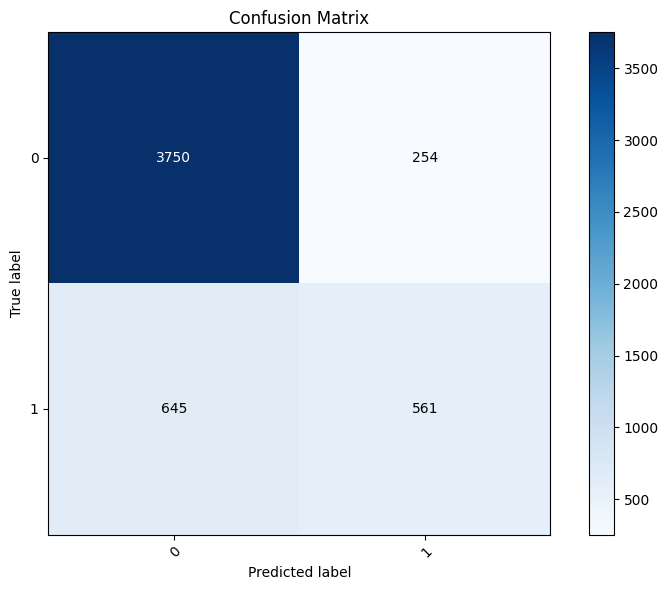

In [23]:
# Generate and display the confusion matrix and classification report
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test['class'], y_pred)
print(cm)

print("\n--- Classification Report ---")
print(classification_report(y_test['class'], y_pred))

# Plot the predictions and the confusion matrix
plot_confusion_matrix(cm, y_test['class'])

In [24]:
# We use GridSearchCV to find the best hyperparameters for the model.
# Cross-validation (CV) helps to get a more robust estimate of model performance
# and prevents overfitting to a single train-test split.

# Define the parameter grid to search over.
# np.logspace(-4,4,2-) tells GridSearchCV to test 20 values for C eenly spaced on logarithmic scale from 10^-4 to 10^4
param_grid = {
    'C': np.logspace(-2, 2, 20),  # Inverse of regularization strength
}

# Initialize GridSearchCV with a 5-fold cross-validation strategy.
grid_search = GridSearchCV(
    estimator=LogisticRegression(solver='lbfgs', random_state=42, max_iter=300),
    param_grid=param_grid,
    cv=5,                     # 5-fold cross-validation
    scoring='accuracy',       # Metric to optimize for
    n_jobs=-1,                # Use all available CPU cores
    verbose=1                 # Print progress
)

print("Starting hyperparameter search. This may take a moment...")
grid_search.fit(X_train[feature_cols], y_train['class'].values.ravel())

Starting hyperparameter search. This may take a moment...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=300, random_state=42),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02])},
             scoring='accuracy', verbose=1)


--- Best Model Found by GridSearchCV ---
Best parameters: {'C': np.float64(0.06951927961775606)}
Best cross-validation accuracy: 0.8241

 Final evaluation of the best model on the test set...
Final accuracy on test set: 0.8276

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4004
           1       0.69      0.46      0.55      1206

    accuracy                           0.83      5210
   macro avg       0.77      0.70      0.72      5210
weighted avg       0.82      0.83      0.81      5210


Confusion Matrix:
[[3753  251]
 [ 647  559]]


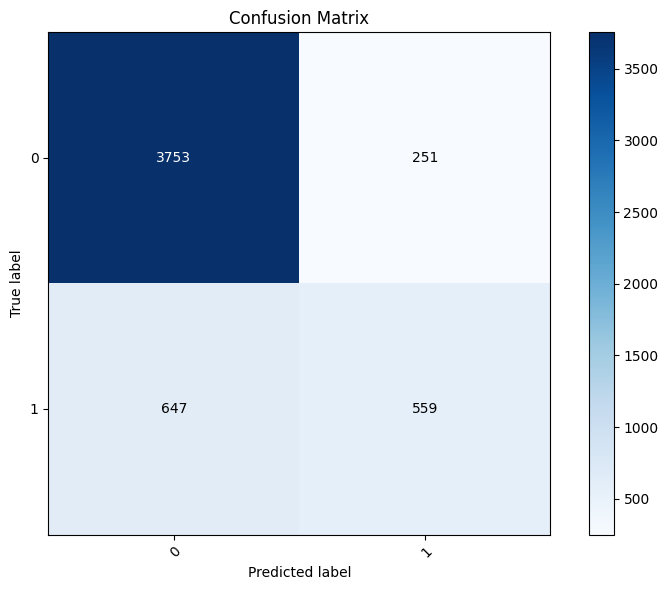

In [25]:
# Get the best estimator from the search.
best_model = grid_search.best_estimator_

print("\n--- Best Model Found by GridSearchCV ---")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

print("\n Final evaluation of the best model on the test set...")
# Predict using the best model found during the search.
final_y_pred = best_model.predict(X_test[feature_cols])
final_accuracy = accuracy_score(y_test['class'], final_y_pred)

print(f"Final accuracy on test set: {final_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test['class'], final_y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test['class'], final_y_pred)
print(cm)

# Plot the predictions and the confusion matrix
plot_confusion_matrix(cm, y_test['class'])

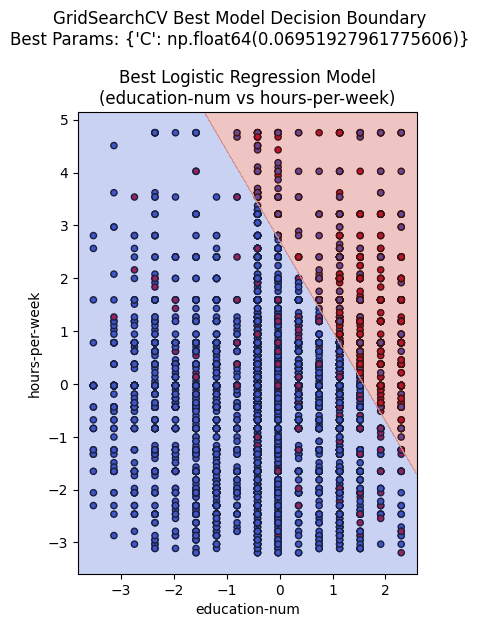

In [26]:
# visualize decision boundary for best log regression model
# numeric columns: 'age','fnlwgt','education-num','capital-gain', 'capital-loss', 'hours-per-week'

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

f1_name, f2_name = "education-num", "hours-per-week"
X_pair_train = X_train[[f1_name, f2_name]]
X_pair_test = X_test[[f1_name, f2_name]]

y_train_encoded = y_train['class'].values.ravel()
y_test_encoded = y_test['class'].values.ravel()

# Retrain logistic regression on just the two features
plot_model = LogisticRegression(
    solver='lbfgs',
    C=best_params.get('C'),
    random_state=42,
    max_iter=300
)
plot_model.fit(X_pair_train.values, y_train_encoded)

# Create figure/axes first
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the data points
ax.scatter(X_pair_train.iloc[:, 0], X_pair_train.iloc[:, 1],
           c=y_train_encoded, cmap=plt.cm.coolwarm,
           s=20, edgecolors='k')

# Decision boundary grid
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                     np.linspace(ylim[0], ylim[1], 500))
Z = plot_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Labels/titles
ax.set_title(f"Best Logistic Regression Model\n({f1_name} vs {f2_name})")
ax.set_xlabel(f1_name)
ax.set_ylabel(f2_name)
ax.set_aspect('equal', adjustable='box')

plt.suptitle(f"GridSearchCV Best Model Decision Boundary\nBest Params: {best_params}", y=1.05)
plt.show()



In [27]:
# Implement best verson of Sklearn Logistic Regression on test dataset

log_reg_best = LogisticRegression(solver='lbfgs', C=best_params.get('C'), random_state=42, max_iter=300).fit(X_train[feature_cols], y_train['class'].values.ravel())
y_pred_best_log_reg = log_reg_best.predict(X_df_test.loc[:,feature_cols])

df_log_reg_pred = pd.DataFrame({
    'original_index': X_df_test['original_index'].values,
    'log_reg_pred': y_pred_best_log_reg
})


display(df_log_reg_pred.head())

#df_log_reg_pred.to_csv('sklearn_log_regression_predictions.csv', index=False)

,original_index,log_reg_pred
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


### SVM:

In [28]:
def plot_svm_decision_boundaries_multi_feature(X, y, kernels, title_prefix="", C=1.0, gamma='scale'):
    """
    Plots the decision boundaries for multiple SVM models and multiple feature pairs,
    automatically handling non-numerical target labels and different data types for y.

    Args:
        X (pd.DataFrame): The input features (must have at least 2 columns).
        y (pd.Series or np.ndarray or pd.DataFrame): The target labels.
        kernels (list): A list of kernel strings (e.g., 'linear', 'rbf', 'poly').
        title_prefix (str): A prefix for the plot titles.
        C (float): The regularization parameter.
        gamma (str or float): Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    """
    # Standardize the y input to a pandas Series
    if isinstance(y, pd.DataFrame):
        if y.shape[1] != 1:
            raise ValueError("If 'y' is a DataFrame, it must contain a single column.")
        y_series = y.iloc[:, 0]
    elif isinstance(y, (pd.Series, np.ndarray)):
        # Convert to Series for consistent handling, and ravel to ensure 1D
        y_series = pd.Series(y.ravel())
    else:
        raise TypeError("y must be a pandas DataFrame, Series, or a NumPy array.")

    # Check the dtype of the uniform y_series and encode if necessary
    if y_series.dtype == 'object':
        print("Encoding string labels to numerical format...")
        le = LabelEncoder()
        y_encoded = le.fit_transform(y_series)
    else:
        y_encoded = y_series.values

    n_features = X.shape[1]
    if n_features < 2:
        raise ValueError("This function requires at least 2 features for plotting combinations.")

    feature_pairs = list(combinations(range(n_features), 2))
    n_pairs = len(feature_pairs)
    n_kernels = len(kernels)

    fig, axes = plt.subplots(n_kernels, n_pairs, figsize=(n_pairs * 6, n_kernels * 5),
                             constrained_layout=True)

    # Ensure axes is a 2D array even for a single row/column
    if n_kernels == 1 and n_pairs == 1:
        axes = np.array([[axes]])
    elif n_kernels == 1:
        axes = np.array([axes])
    elif n_pairs == 1:
        axes = axes.reshape(-1, 1)

    for i, kernel in enumerate(kernels):
        for j, (f1_idx, f2_idx) in enumerate(feature_pairs):
            ax = axes[i, j]

            # Select the two features for the current plot
            X_pair = X.iloc[:, [f1_idx, f2_idx]]
            f1_name = X.columns[f1_idx]
            f2_name = X.columns[f2_idx]

            # Train the SVM model on the selected features
            if kernel == 'poly':
                model = SVC(kernel=kernel, C=C, gamma=gamma, degree=3)
            else:
                model = SVC(kernel=kernel, C=C, gamma=gamma)
            
            # FIT THE MODEL WITH .values TO AVOID THE WARNING
            model.fit(X_pair.values, y_encoded)

            # Plot the data points with encoded labels
            ax.scatter(X_pair.iloc[:, 0], X_pair.iloc[:, 1], c=y_encoded, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

            # Create and plot the decision boundary
            xlim = ax.get_xlim()
            ylim = ax.get_ylim()
            xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                                 np.linspace(ylim[0], ylim[1], 500))
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
            
            # Highlight the support vectors
            ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                       linewidth=1, facecolors='none', edgecolors='k')
            
            # Set titles and labels
            ax.set_title(f"{title_prefix} {kernel.capitalize()} ({f1_name} vs {f2_name})")
            ax.set_xlabel(f1_name)
            ax.set_ylabel(f2_name)
            ax.set_aspect('equal', adjustable='box')

    plt.show()

In [29]:
def plot_best_svm_decision_boundary(grid_search, X, y):
    """
    Plots the decision boundaries for the best SVM model found by GridSearchCV.

    Args:
        grid_search (GridSearchCV): The fitted GridSearchCV object.
        X (pd.DataFrame): The input features (must be a DataFrame for feature names).
        y (pd.Series or np.ndarray): The target labels.
    """
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_kernel = best_params.get('kernel', 'linear') # Default to linear if not found

    # Standardize the y input and encode if necessary
    if isinstance(y, pd.DataFrame):
        if y.shape[1] != 1:
            raise ValueError("If 'y' is a DataFrame, it must contain a single column.")
        y_series = y.iloc[:, 0]
    elif isinstance(y, pd.Series):
        y_series = y
    elif isinstance(y, np.ndarray):
        y_series = pd.Series(y.ravel())
    else:
        raise TypeError("y must be a pandas DataFrame, Series, or a NumPy array.")
    
    if y_series.dtype == 'object':
        print("Encoding string labels to numerical format...")
        le = LabelEncoder()
        y_encoded = le.fit_transform(y_series)
    else:
        # Ensure y_series is a pandas Series before calling .values
        if isinstance(y_series, np.ndarray):
            y_encoded = y_series
        else:
            y_encoded = y_series.values

    n_features = X.shape[1]
    if n_features < 2:
        raise ValueError("This function requires at least 2 features for plotting combinations.")

    feature_pairs = list(combinations(range(n_features), 2))
    n_pairs = len(feature_pairs)
    
    fig, axes = plt.subplots(1, n_pairs, figsize=(n_pairs * 6, 6), constrained_layout=True)

    # Ensure axes is an array even for a single subplot
    if n_pairs == 1:
        axes = [axes]

    for j, (f1_idx, f2_idx) in enumerate(feature_pairs):
        ax = axes[j]
        
        # Select the two features for the current plot
        X_pair = X.iloc[:, [f1_idx, f2_idx]]
        f1_name = X.columns[f1_idx]
        f2_name = X.columns[f2_idx]

        # Use the best model from GridSearchCV
        model = best_model
        
        # Since the best model was trained on the full dataset, we'll retrain
        # a new instance of it on just the two features for plotting purposes.
        # This is the most reliable way to ensure the decision boundary is correct.
        plot_model = SVC(
            kernel=best_params.get('kernel'),
            C=best_params.get('C'),
            gamma=best_params.get('gamma')
        )
        if best_kernel == 'poly':
            plot_model.degree = best_params.get('degree', 3) # Handle poly degree separately
        plot_model.fit(X_pair.values, y_encoded)
        
        # Plot the data points
        ax.scatter(X_pair.iloc[:, 0], X_pair.iloc[:, 1], c=y_encoded, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

        # Create and plot the decision boundary
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                             np.linspace(ylim[0], ylim[1], 500))
        Z = plot_model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        
        # Highlight the support vectors
        ax.scatter(plot_model.support_vectors_[:, 0], plot_model.support_vectors_[:, 1], s=100,
                   linewidth=1, facecolors='none', edgecolors='k')
        
        # Set titles and labels
        ax.set_title(f"Best Model ({best_kernel.capitalize()} kernel)\n({f1_name} vs {f2_name})")
        ax.set_xlabel(f1_name)
        ax.set_ylabel(f2_name)
        ax.set_aspect('equal', adjustable='box')

    plt.suptitle(f"GridSearchCV Best Model Decision Boundaries\nBest Params: {best_params}", y=1.05)
    plt.show()


--- Confusion Matrix ---
[[3888  116]
 [ 841  365]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4004
           1       0.76      0.30      0.43      1206

    accuracy                           0.82      5210
   macro avg       0.79      0.64      0.66      5210
weighted avg       0.81      0.82      0.78      5210



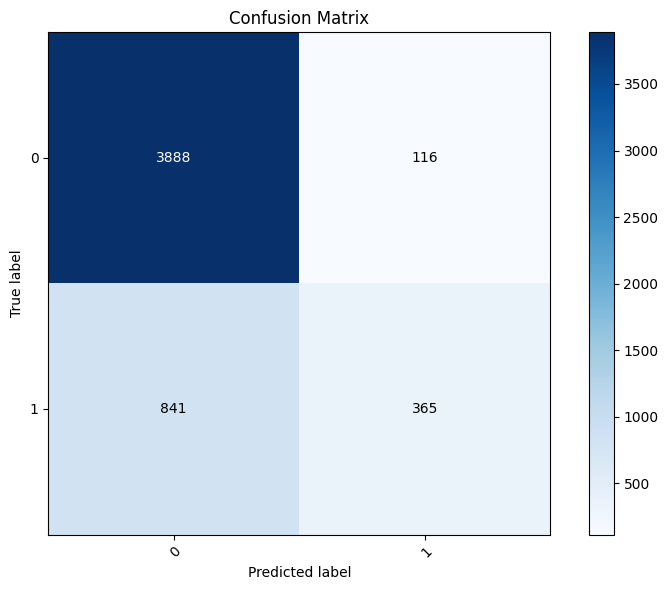

In [30]:
# Train with linear kernel
model_linear = SVC(kernel='linear', C=1)
model_linear.fit(X_train.loc[:, feature_cols].values, y_train['class'].values)

# Make predictions on the scaled test set 
y_pred = model_linear.predict(X_test.loc[:, feature_cols].values)

# Generate and display the confusion matrix and classification report
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test['class'], y_pred)  
print(cm)

print("\n--- Classification Report ---")
print(classification_report(y_test['class'], y_pred))  

# Plot the predictions and the confusion matrix
plot_confusion_matrix(cm, y_test['class'])  

/var/folders/06/7t728qgx7lgc1n3hdwb3gwhw0000gn/T/ipykernel_88543/3541958806.py:21: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_series = pd.Series(y.ravel())


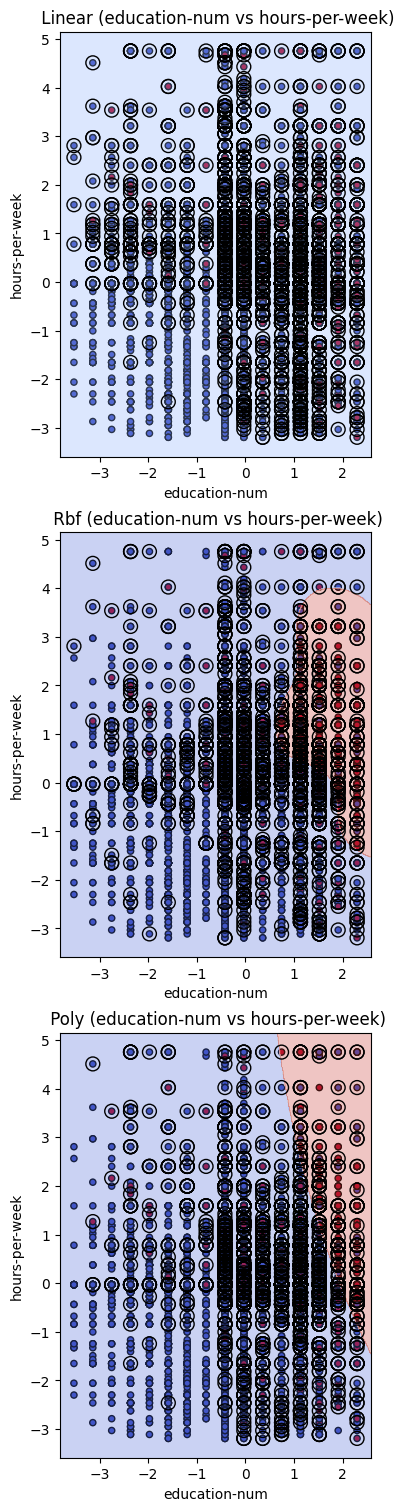

In [31]:
# Plot decision boundaries for different kernels (ONLY 2 FEATURES)
plot_svm_decision_boundaries_multi_feature(X_train.loc[:, ['education-num', 'hours-per-week']], 
                                           y_train['class'], 
                                           kernels=['linear', 'rbf', 'poly'])

In [32]:
# We use GridSearchCV to find the best hyperparameters for the model.
# Cross-validation (CV) helps to get a more robust estimate of model performance
# and prevents overfitting to a single train-test split.

# Define the parameter grid to search over.
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'], # reduce to 2, removed poly
    'gamma': ['scale', 'auto']
}


# Initialize GridSearchCV with a 5-fold cross-validation strategy.
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=3,                     # 3-fold cross-validation
    scoring='accuracy',       # Metric to optimize for
    n_jobs=-1,                # Use all available CPU cores
    verbose=1                 # Print progress
)

print("Starting hyperparameter search. This may take a moment...")
grid_search.fit(X_train.loc[:, feature_cols].values, y_train['class'].values)

Starting hyperparameter search. This may take a moment...
Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)


--- Best Model Found by GridSearchCV ---
Best parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.8422

 Final evaluation of the best model on the test set...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Final accuracy on test set: 0.8413

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4004
           1       0.70      0.55      0.61      1206

    accuracy                           0.84      5210
   macro avg       0.79      0.74      0.76      5210
weighted avg       0.83      0.84      0.83      5210


Confusion Matrix:
[[3723  281]
 [ 546  660]]


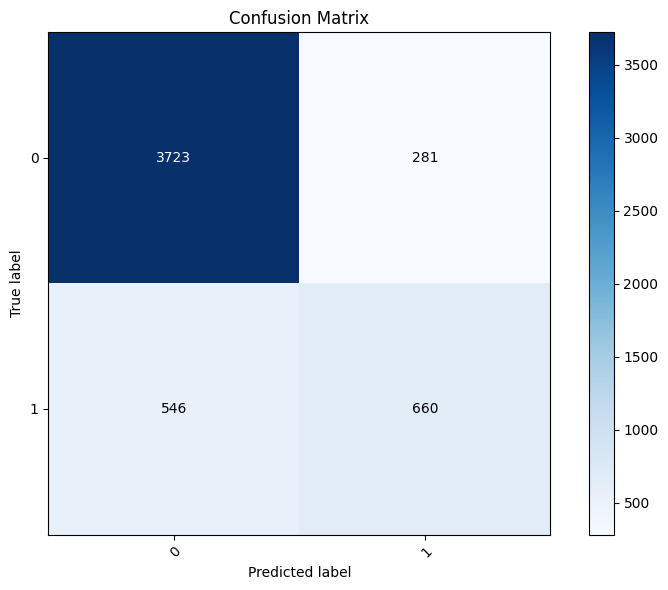

In [33]:
# Get the best estimator from the search.
best_model = grid_search.best_estimator_

print("\n--- Best Model Found by GridSearchCV ---")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

print("\n Final evaluation of the best model on the test set...")
# Predict using the best model found during the search.
final_y_pred = best_model.predict(X_test.loc[:, feature_cols])
final_accuracy = accuracy_score(y_test['class'], final_y_pred)

print(f"Final accuracy on test set: {final_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test['class'], final_y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test['class'], final_y_pred)
print(cm)

# Plot the predictions and the confusion matrix
plot_confusion_matrix(cm, y_test['class'])

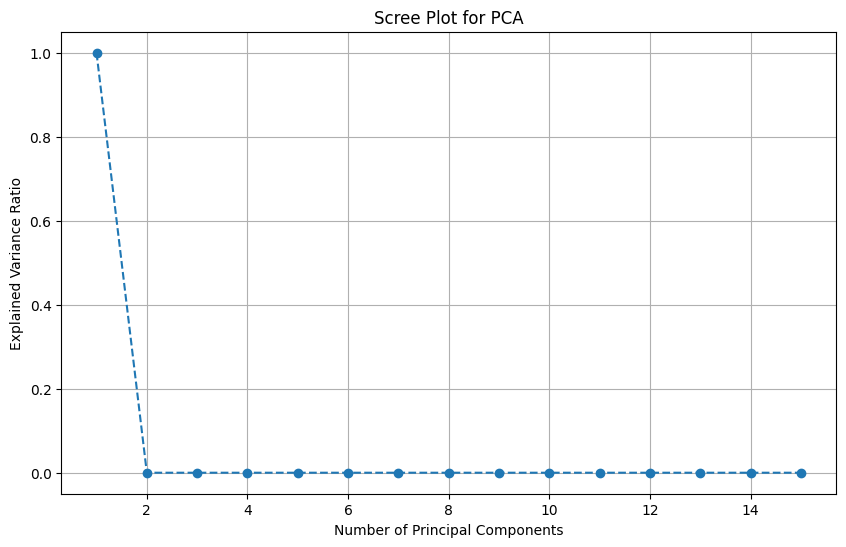

In [34]:
# Perform PCA without assuming a fixed number of components
# By default, PCA will compute all n_features components.
pca = PCA()
pca.fit(X_train) # this is on x train to compare performance 

plt.figure(figsize=(10, 6))
explained_variance_ratio = pca.explained_variance_ratio_
components = range(1, len(explained_variance_ratio) + 1)
plt.plot(components, explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA')
plt.grid(True)
plt.show()

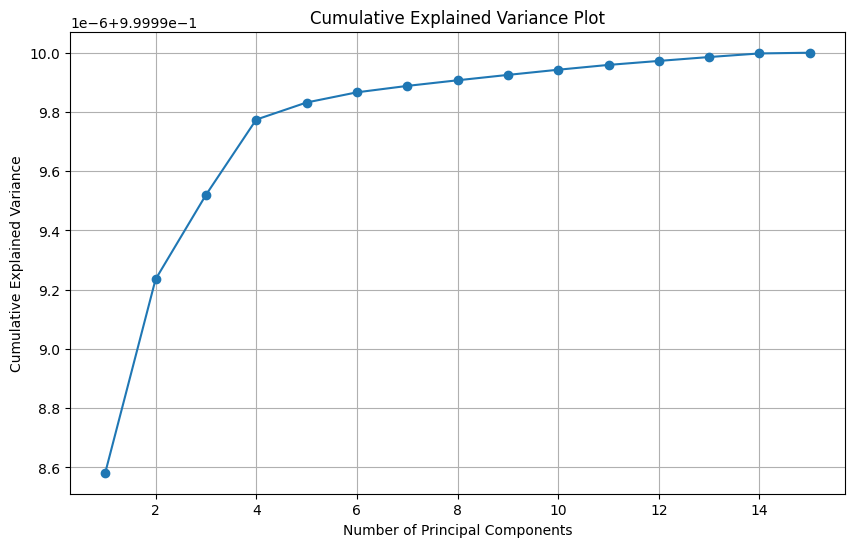

In [35]:
# create the Cumulative Explained Variance Plot
plt.figure(figsize=(10, 6))
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(components, cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)

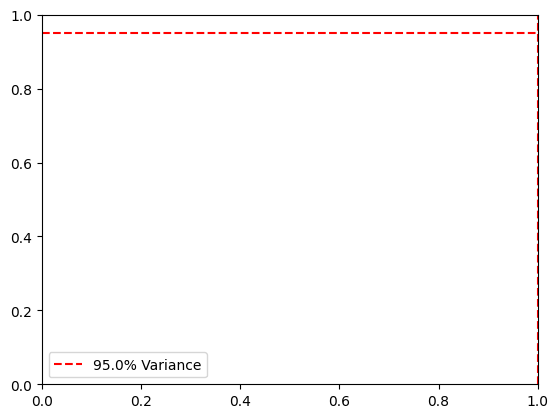

In [36]:
# Highlight a target variance, e.g., 95%
target_variance = 0.95
num_components_95 = np.argmax(cumulative_variance >= target_variance) + 1
plt.axvline(x=num_components_95, color='r', linestyle='--', label=f'{target_variance*100}% Variance')
plt.axhline(y=target_variance, color='r', linestyle='--')
plt.legend()
plt.show()

In [37]:
# Find the number of components for a target variance programmatically
num_components_for_95_percent = np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.95) + 1
print(f"Number of components to explain 95% of variance: {num_components_for_95_percent}")

Number of components to explain 95% of variance: 1


In [38]:
# use number of components created in PCA to plot
# Create a DataFrame for the principal components for easier plotting
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train.loc[:, feature_cols]) # Fit and transform training data
X_test_pca = pca.transform(X_test.loc[:, feature_cols]) # Transform the test data using the fitted PCA

pca_df = pd.DataFrame(data=X_train_pca, columns=['principal component 1'])
pca_df['target'] = y_train['class']

In [39]:
# Print the explained variance ratio
# This shows how much of the original data's variance is explained by each component.
print("Explained variance ratio of the components:")
print(pca.explained_variance_ratio_)
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2f}")

Explained variance ratio of the components:
[0.46056985]
Total variance explained: 0.46


In [40]:
# Inspect the principal components_ attribute
# This shows the coefficients of the original features for each component
principal_components_matrix = pca.components_

# Create a DataFrame for better readability
component_df = pd.DataFrame(
    data=principal_components_matrix,
    columns=X.loc[:, feature_cols].columns,
    index=['Principal Component 1']
)

print("Principal Component Loadings:")
print(component_df)

Principal Component Loadings:
                            age  workclass    fnlwgt  education  \
Principal Component 1 -0.000742  -0.000372 -0.010672   0.089064   

                       education-num  marital-status  occupation  \
Principal Component 1       0.019386       -0.008198   -0.009742   

                       relationship      race       sex  capital-gain  \
Principal Component 1     -0.003917  0.016335  0.000186      0.001371   

                       capital-loss  hours-per-week  native-country  
Principal Component 1      0.002436        0.001558        0.995551  


In [42]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 5],
    'kernel': ['linear'], # reduced for speed
    'gamma': ['scale', 'auto']
}

# Create and fit the GridSearchCV object with the PCA-transformed data
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=2, verbose=2, n_jobs=-1) # only 2 fold for speed
grid_search.fit(X_train_pca, y_train['class'])

# Print the best parameters and score
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   3.7s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   3.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   3.8s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   3.8s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=  44.2s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=  44.3s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 1.6min
[CV] END .....................C=1, gamma=auto, kernel=linear; total time= 1.6min
[CV] END ....................C=5, gamma=scale, kernel=linear; total time=16.4min
[CV] END .....................C=5, gamma=auto, kernel=linear; total time=16.4min
[CV] END .....................C=5, gamma=auto, kernel=linear; total time=17.8min
[CV] END ....................C=5, gamma=scale, ke

In [43]:
# Get the best estimator from the search.
best_model = grid_search.best_estimator_

print("\n--- Best Model Found by GridSearchCV ---")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

print("\n Final evaluation of the best model on the test set...")
# Predict using the best model found during the search.
final_y_pred = best_model.predict(X_test_pca)

final_accuracy = accuracy_score(y_test, final_y_pred)

print(f"Final accuracy on test set: {final_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, final_y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, final_y_pred)
print(cm)

# Plot the predictions and the confusion matrixkx
plot_confusion_matrix(cm, y_test)


--- Best Model Found by GridSearchCV ---
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.7570

 Final evaluation of the best model on the test set...


ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets